100%|██████████| 20/20 [00:00<00:00, 930.37it/s]

Difference in powers of 10 at n=2: 1.2851401425356848
296073188139524.2
Difference in powers of 10 at n=3: 2.719378342053403
12102705024879.281
Difference in powers of 10 at n=4: 4.190716473378835
435508460362.0848
Difference in powers of 10 at n=5: 5.678160644631732
14807514793.172894
Difference in powers of 10 at n=6: 7.1746719448921485
487649535.45137835
Difference in powers of 10 at n=7: 8.677029355768319
15735120.407217957
Difference in powers of 10 at n=8: 10.183485529576576
500592.6541558459
Difference in powers of 10 at n=9: 11.692982035680487
15761.178753912727
Difference in powers of 10 at n=10: 13.204798801575901
492.370160977559
Difference in powers of 10 at n=11: 14.717687752307812
15.305104620180796
Difference in powers of 10 at n=12: 16.20982692560044
0.46164777064963547
Difference in powers of 10 at n=13: 17.68000829138893
0.002442707573293075
Difference in powers of 10 at n=14: 17.406795376649008
0.013295516472471009
Difference in powers of 10 at n=15: 17.3972361856149

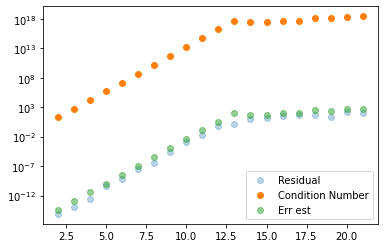

In [1]:
from scipy.linalg import hilbert as hilb
import scipy
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

rns = []
cns = []
err = []
diff = []
max_n = 21

# Loop through values of n = 2, 3, ...., 21 and make a plot of rn and cn vs. matrix order n
for n in tqdm(range(2, max_n + 1)):
    # 1. Start with a known vector x0=[1,1,1,1,⋯]T where x0  is of length n.
    x0 = np.ones(n)

    # 2. Create the nth degree Hilbert matrix using the Matlab built-in “hilb()”
    Hn = hilb(n)

    # 3. Compute the matrix condition number  cn = cond(Hn).
    cn = np.linalg.cond(Hn)

    # 4. Compute the matrix vector product b = Hn x0
    b = np.dot(Hn, x0)

    # 5. Perform the linear solve operation xc = Hn \ b.
    xc = np.linalg.solve(Hn, b)

    # 6. Compute the norm of the difference between the computed and the starting x0: rn = ∥x0−xc∥ In theory, what should be the value of rn?
    rn = np.linalg.norm(xc - x0)
    # In theory, rn should be the 0 vector

    # For each n, also compute and plot the error estimate given by Moler, errest = cond(Hn)*eps(1)
    errest = cn * np.finfo(float).eps
    rns.append(rn)
    cns.append(cn)
    err.append(errest)
    print(f"Difference in powers of 10 at n={n}:", np.log10(abs(rn - cn)))
    print(min(scipy.linalg.svdvals(Hn)) / np.finfo(float).eps)

plt.scatter(list(range(2, max_n + 1)), rns, label='Residual', alpha=.3)
plt.scatter(list(range(2, max_n + 1)), cns, label='Condition Number', alpha=1)
plt.scatter(list(range(2, max_n + 1)), err, label='Err est', alpha=.5)

plt.yscale("log")
plt.legend()

### How many orders of magnitude separate the value of the residual and the value of the condition number?  Why is this the case?

As n increases, as does the order of magnitude of separation between the residual and condition number at n.
The condition number grows as order $O(\frac{(1 + \sqrt{2})^{4n}}{\sqrt{n}})$, whereas the residual operation is not an exponential time operation.
The exponential growth in the residual is therefore due to the difference in asymptotic growth between the `linsolve()` and condition number operations.

### Why do the condition number and the residual seem to saturate for $n \geq 13$?  Hint:  Matlab’s `cond()` actually computes the inverse of the condition number, $1/κ$.  What effect might round-off error have on $1/κ$?

Probably because as n is 13 or higher, the condition number ends up being the max float over `eps(1)`, and the machine is losing information due to floating point stability.

Round-off error with large values could lead to much larger errors in any derived calculations.

